<a href="https://colab.research.google.com/github/nojiyoon/SeSAC_code/blob/main/1%EC%9B%9420%EC%9D%BC_%ED%9A%8C%EA%B7%80%EC%8B%A4%EC%8A%B5_%EC%9E%90%EC%A0%84%EA%B1%B0%EB%8C%80%EC%97%AC%ED%9A%9F%EC%88%98%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터
https://www.kaggle.com/c/bike-sharing-demand

### 컬럼정보
- datetime : hourly date + timestamp
- season : 1=봄, 2=여름, 3=가을, 4=겨울
- holiday : 1=휴일, 0=휴일이 아닌 날
- workingday: 1=주중, 0=주말
- weather : 1=맑음,약간구름낀 흐림, 2=안개,안개+흐림, 3=가벼운눈,가벼운비+천둥, 4=심한눈/비,천둥/번개
- temp: 온도(섭씨)
- atemp: 체감온도(섭씨)
- humidity: 상대습도
- windspeed: 풍속
- casual: 사전에 등록되지 않은 사용자가 대여한 횟수
- registered: 사전에 등록한 사용자가 대여한 횟수
- count: 대여횟수 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# 그래프에서 격자로 숫자 범위가 눈에 잘 띄도록 해줌
plt.style.use('ggplot')

In [ ]:
 train = pd.read_csv('/content/drive/MyDrive/2022새싹/인공지능 자연어처리 및 음성인식 음성합성 기술을 활용한 응용 SW 개발자 양성과정 /1.머신러닝/workspace/bike.csv')
 train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [ ]:
train['datetime'] = pd.to_datetime(train['datetime'])

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [ ]:
train.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [ ]:
# datetime을 년, 월, 일, 시, 분 칼럼으로 나누기

datetime = train['datetime']
datetime.head()

0   2011-01-01 00:00:00
1   2011-01-01 01:00:00
2   2011-01-01 02:00:00
3   2011-01-01 03:00:00
4   2011-01-01 04:00:00
Name: datetime, dtype: datetime64[ns]

In [ ]:
train['year'] = datetime.dt.year
train['year'].head()

0    2011
1    2011
2    2011
3    2011
4    2011
Name: year, dtype: int64

In [ ]:
train['month'] = datetime.dt.month
train['month'].head()

0    1
1    1
2    1
3    1
4    1
Name: month, dtype: int64

In [ ]:
train['day'] = datetime.dt.day
train['day'].head()

0    1
1    1
2    1
3    1
4    1
Name: day, dtype: int64

In [ ]:
train['hour'] = datetime.dt.hour
train['hour'].head()

0    0
1    1
2    2
3    3
4    4
Name: hour, dtype: int64

In [ ]:
train['minute'] = datetime.dt.minute
train['minute'].head()

0    0
1    0
2    0
3    0
4    0
Name: minute, dtype: int64

In [ ]:
train['count']

0         16
1         40
2         32
3         13
4          1
        ... 
10881    336
10882    241
10883    168
10884    129
10885     88
Name: count, Length: 10886, dtype: int64

In [ ]:
# 대여한 자전거수
# 2011~2012 전체평균

train['count'].mean()

191.57413191254824

In [ ]:
train.groupby('year')

In [ ]:
list(train.groupby('year'))

[(2011,
                  datetime  season  holiday  workingday  ...  month  day  hour  minute
  0    2011-01-01 00:00:00       1        0           0  ...      1    1     0       0
  1    2011-01-01 01:00:00       1        0           0  ...      1    1     1       0
  2    2011-01-01 02:00:00       1        0           0  ...      1    1     2       0
  3    2011-01-01 03:00:00       1        0           0  ...      1    1     3       0
  4    2011-01-01 04:00:00       1        0           0  ...      1    1     4       0
  ...                  ...     ...      ...         ...  ...    ...  ...   ...     ...
  5417 2011-12-19 19:00:00       4        0           1  ...     12   19    19       0
  5418 2011-12-19 20:00:00       4        0           1  ...     12   19    20       0
  5419 2011-12-19 21:00:00       4        0           1  ...     12   19    21       0
  5420 2011-12-19 22:00:00       4        0           1  ...     12   19    22       0
  5421 2011-12-19 23:00:00       4 

In [24]:
# 연도별 대여대수 평균
train.groupby('year').mean()[['count']]

,count
year,
2011,144.223349
2012,238.560944


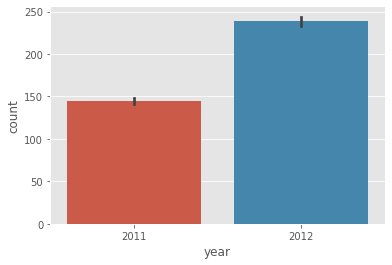

In [23]:
sns.barplot(data=train, x='year', y='count')

In [25]:
# 월별 대여대수 평균
train.groupby('month').mean()[['count']]

,count
month,
1,90.366516
2,110.003330
3,148.169811
4,184.160616
5,219.459430
6,242.031798
7,235.325658
8,234.118421
9,233.805281


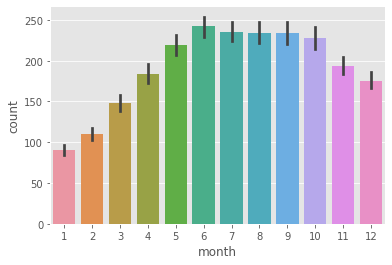

In [26]:
sns.barplot(data=train, x='month', y='count')

In [27]:
# 시간별 대여대수 평균
train.groupby('hour').mean()[['count']]

,count
hour,
0,55.138462
1,33.859031
2,22.899554
3,11.757506
4,6.407240
5,19.767699
6,76.259341
7,213.116484
8,362.769231


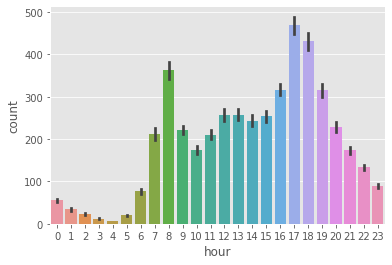

In [28]:
# 출퇴근 시간에 많이 빌림
sns.barplot(data=train, x='hour', y='count')

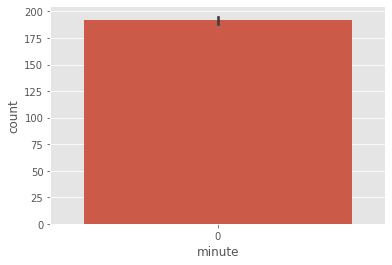

In [38]:
# 모든 데이터가 0. 삭제할 것.
sns.barplot(data=train, x='minute', y='count')

In [29]:
train['dayofweek'] = datetime.dt.dayofweek
train['dayofweek'].head()

0    5
1    5
2    5
3    5
4    5
Name: dayofweek, dtype: int64

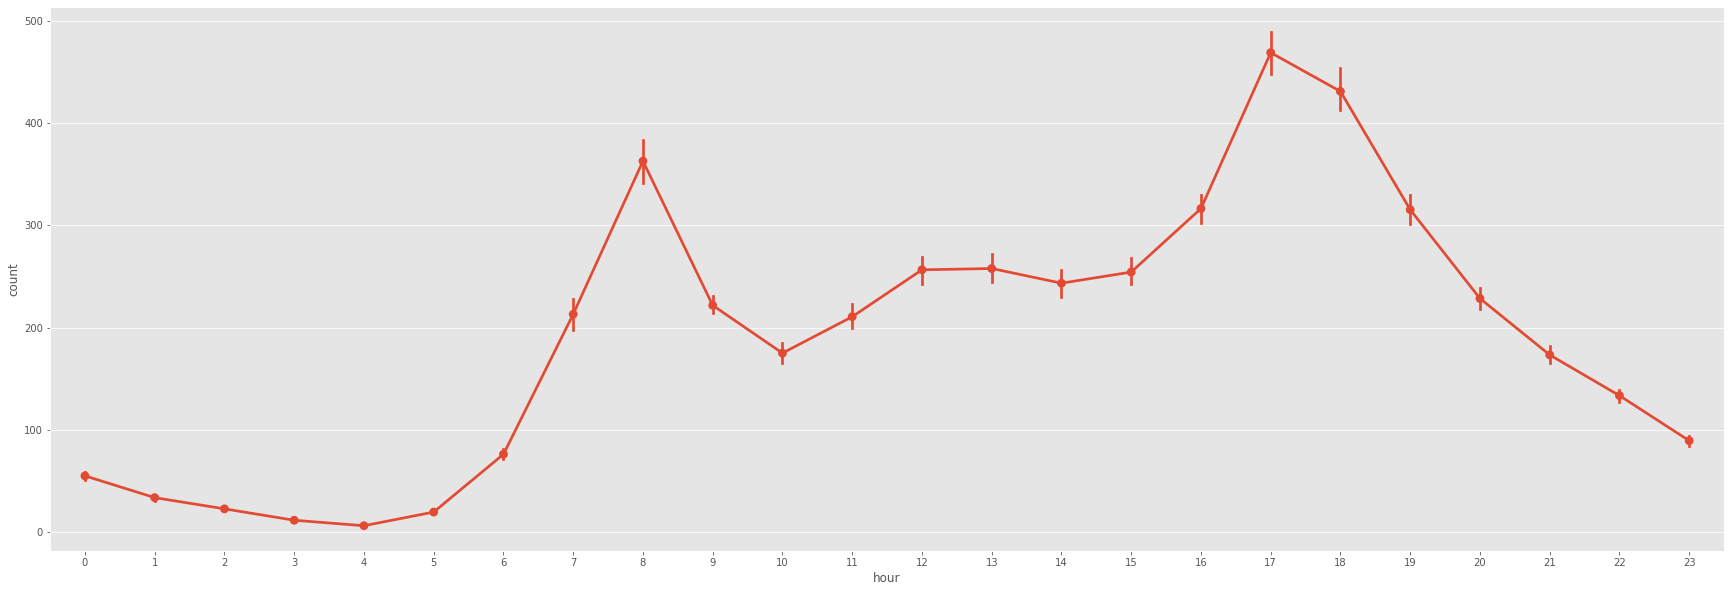

In [39]:
plt.figure(figsize=(30,10))
sns.pointplot(data=train, x='hour', y='count')

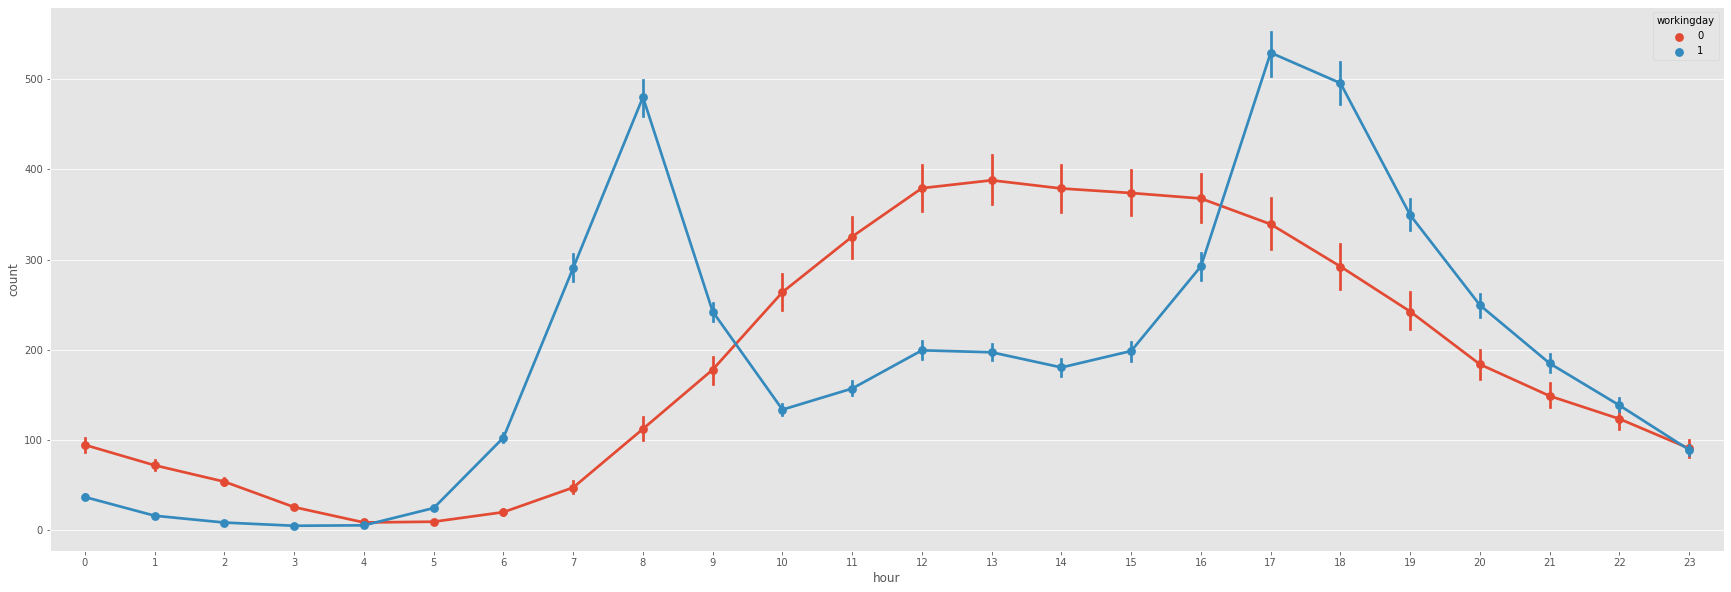

In [37]:
plt.figure(figsize=(30,10))
sns.pointplot(data=train, x='hour', y='count', hue='workingday')

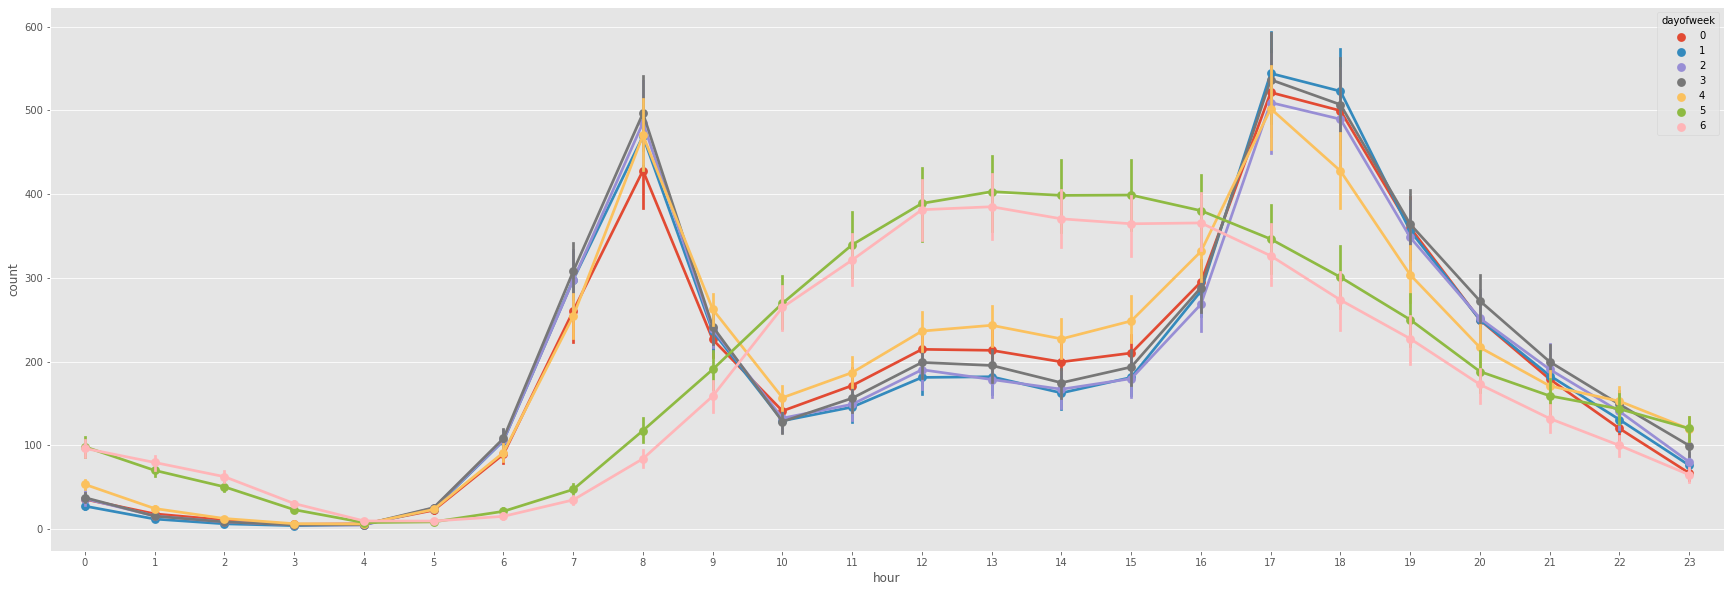

In [33]:
plt.figure(figsize=(30,10))
sns.pointplot(data=train, x='hour', y='count', hue='dayofweek')

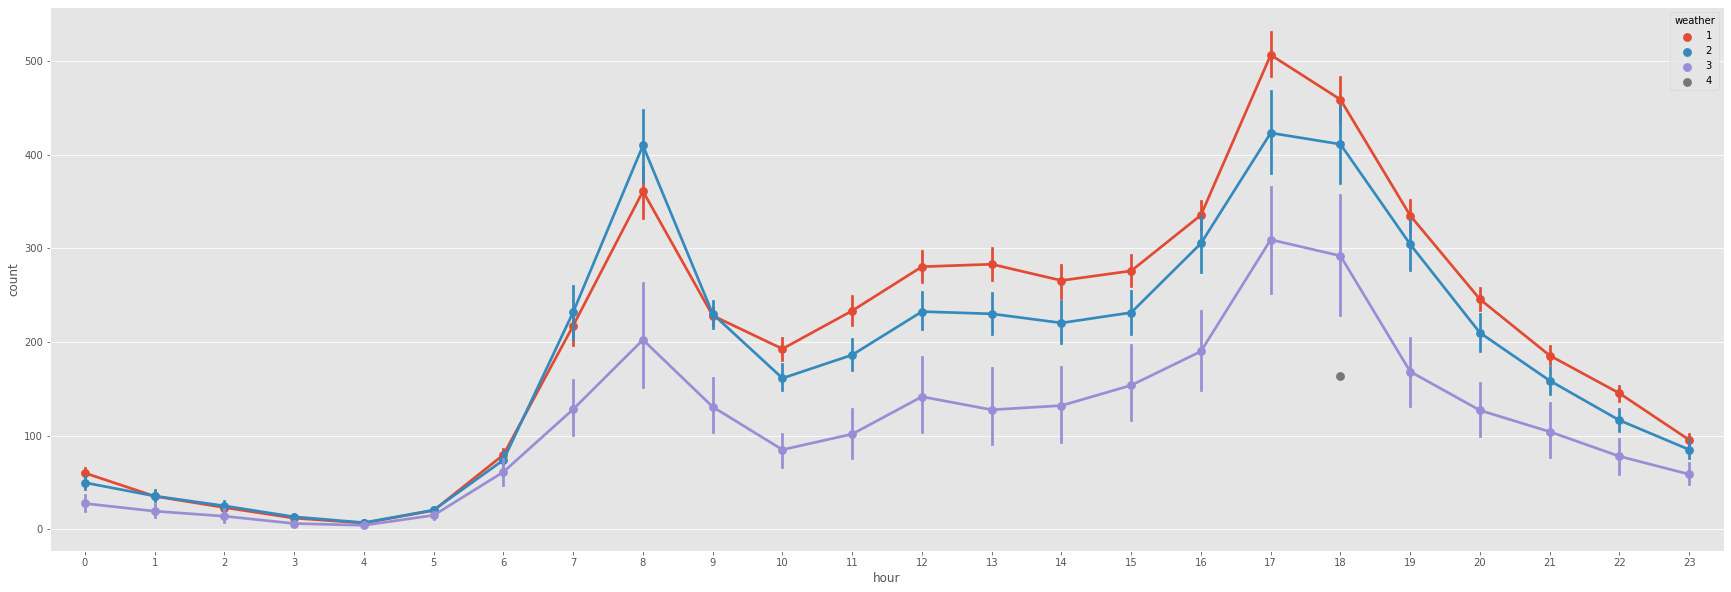

In [34]:
# 1=맑음,약간구름낀 흐림, 2=안개,안개+흐림, 3=가벼운눈,가벼운비+천둥, 4=심한눈/비,천둥/번개

plt.figure(figsize=(30,10))
sns.pointplot(data=train, x='hour', y='count', hue='weather')

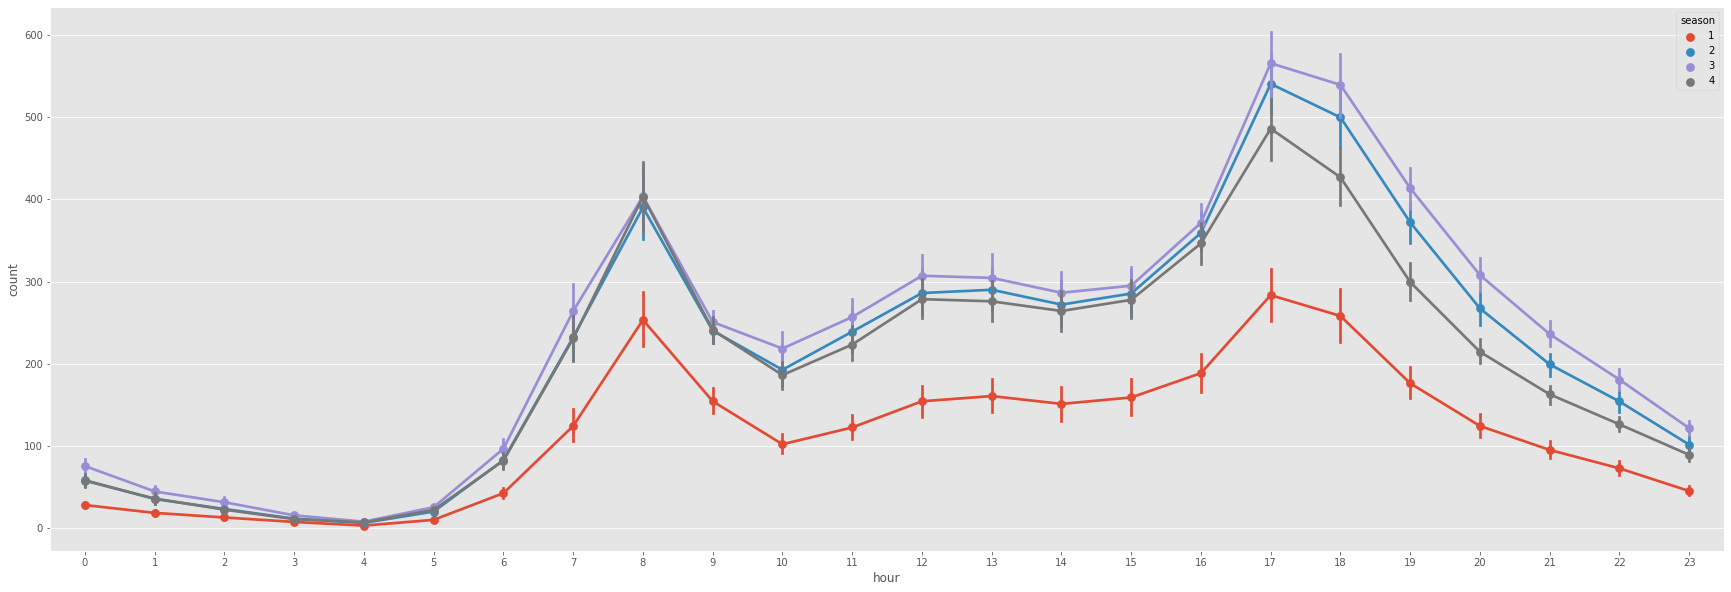

In [35]:
plt.figure(figsize=(30,10))
sns.pointplot(data=train, x='hour', y='count', hue='season')

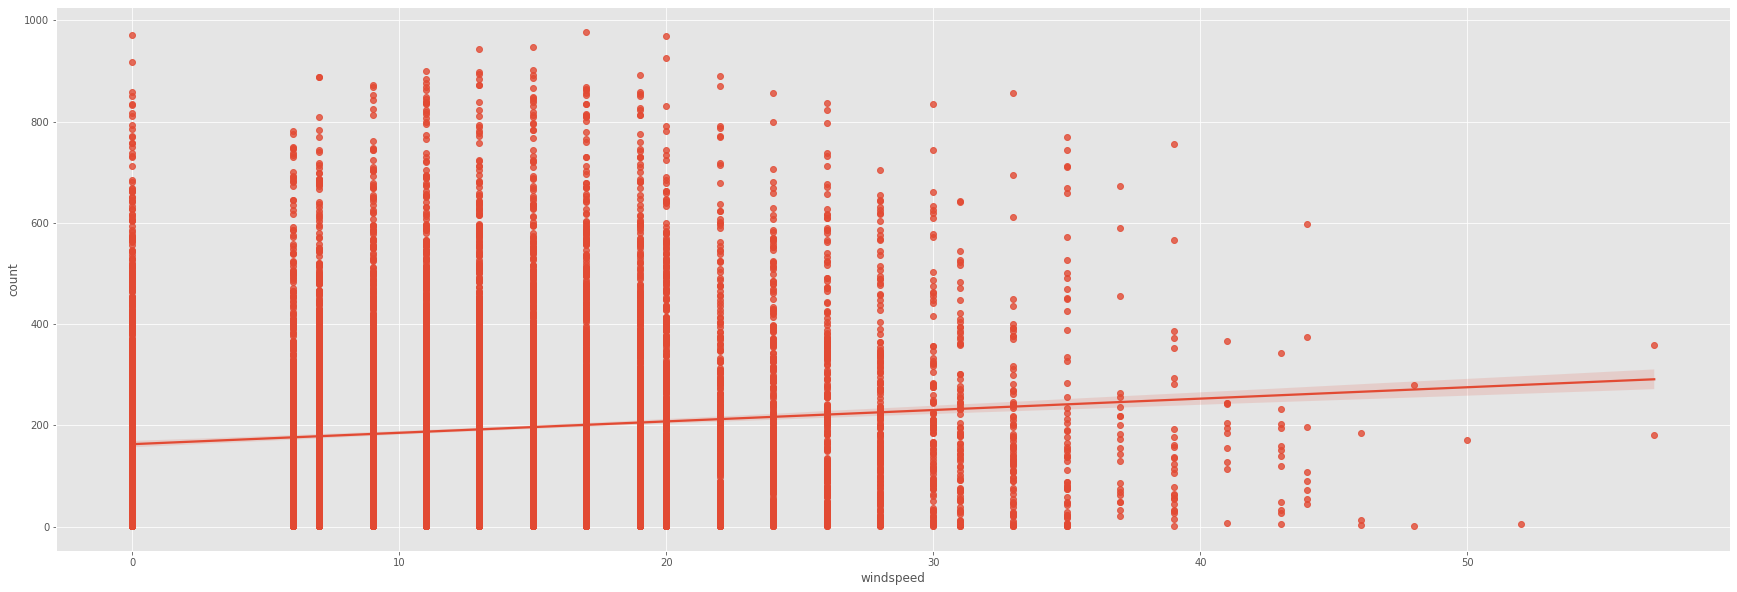

In [36]:
# 풍속별 대여횟수의 값을 점으로 표시
# 0은 관측되지 않은 수치일 것으로 추측.

plt.figure(figsize=(30,10))
sns.regplot(data=train, x='windspeed', y='count')

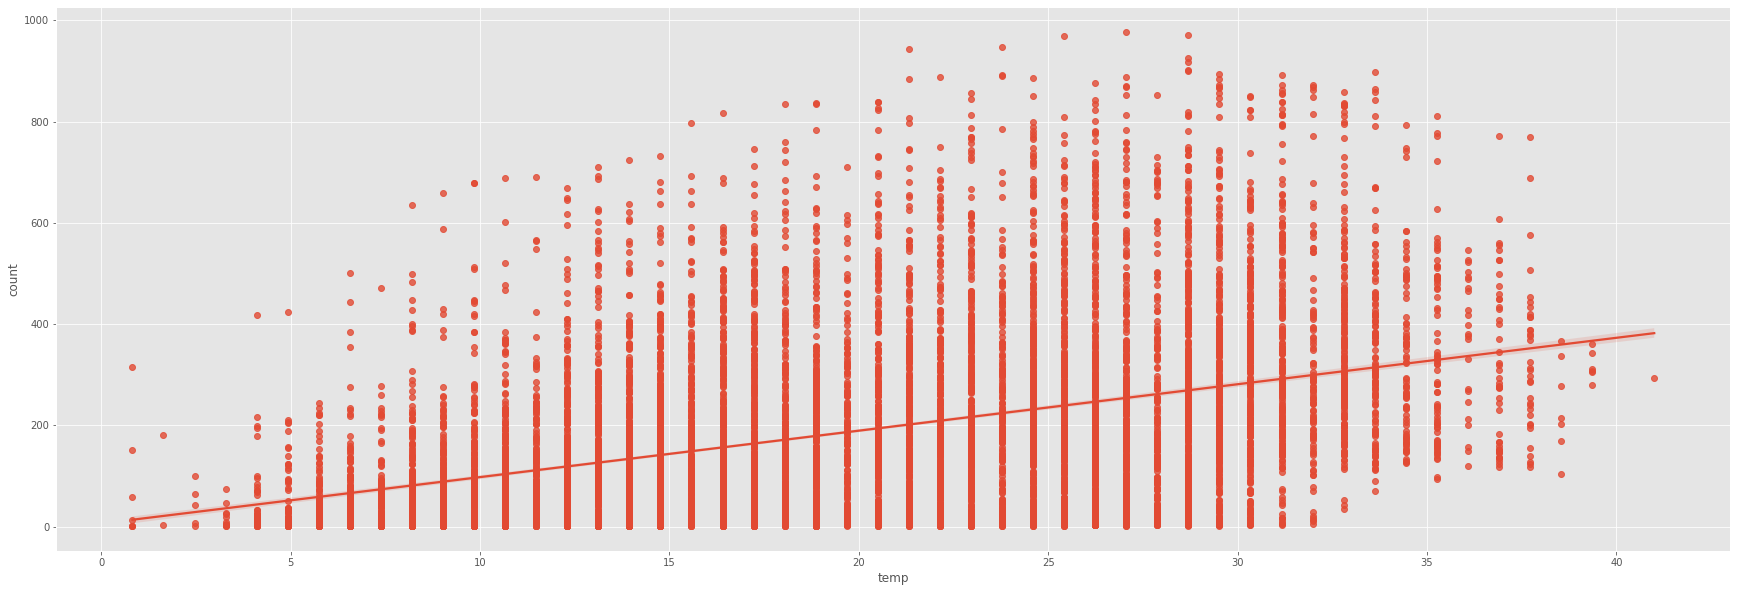

In [40]:
# 온도별 대여횟수

plt.figure(figsize=(30,10))
sns.regplot(data=train, x='temp', y='count')

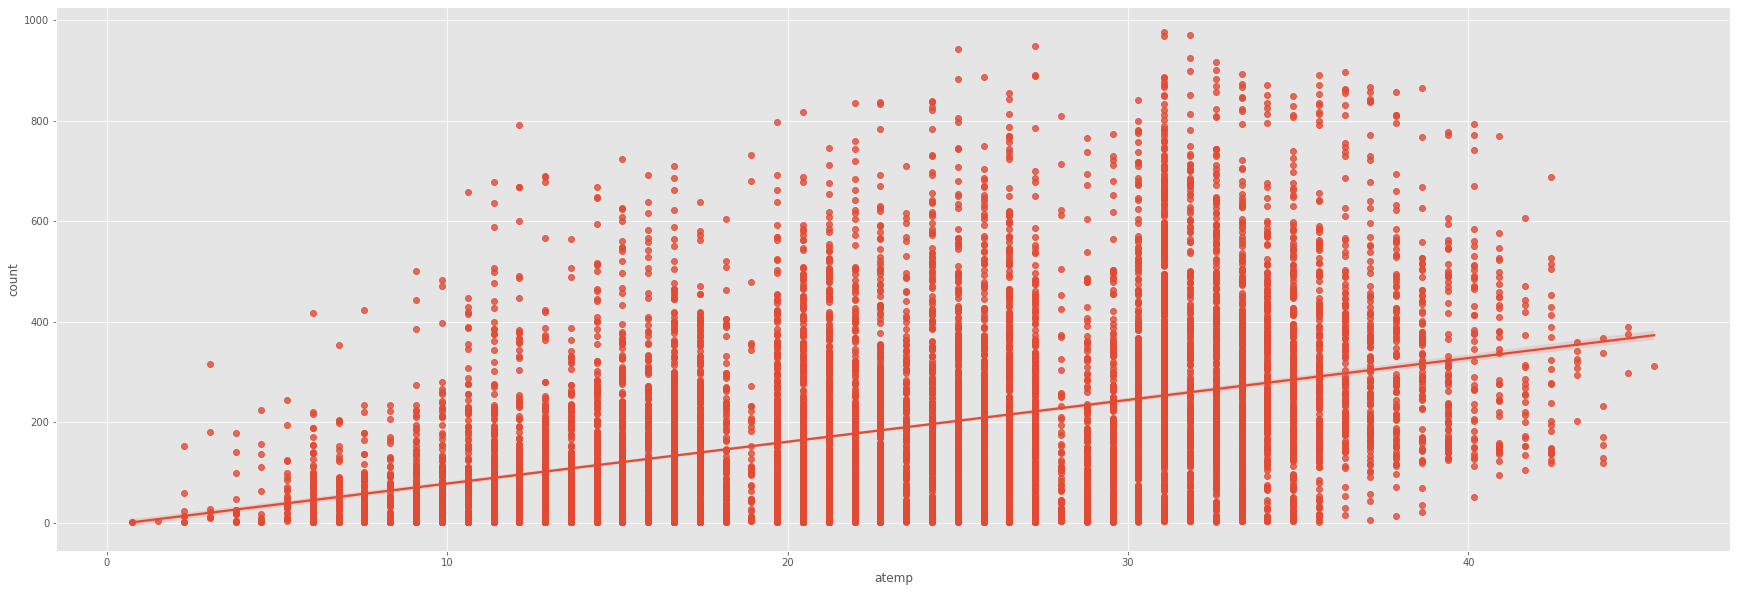

In [41]:
# 체감온도별 대여횟수

plt.figure(figsize=(30,10))
sns.regplot(data=train, x='atemp', y='count')

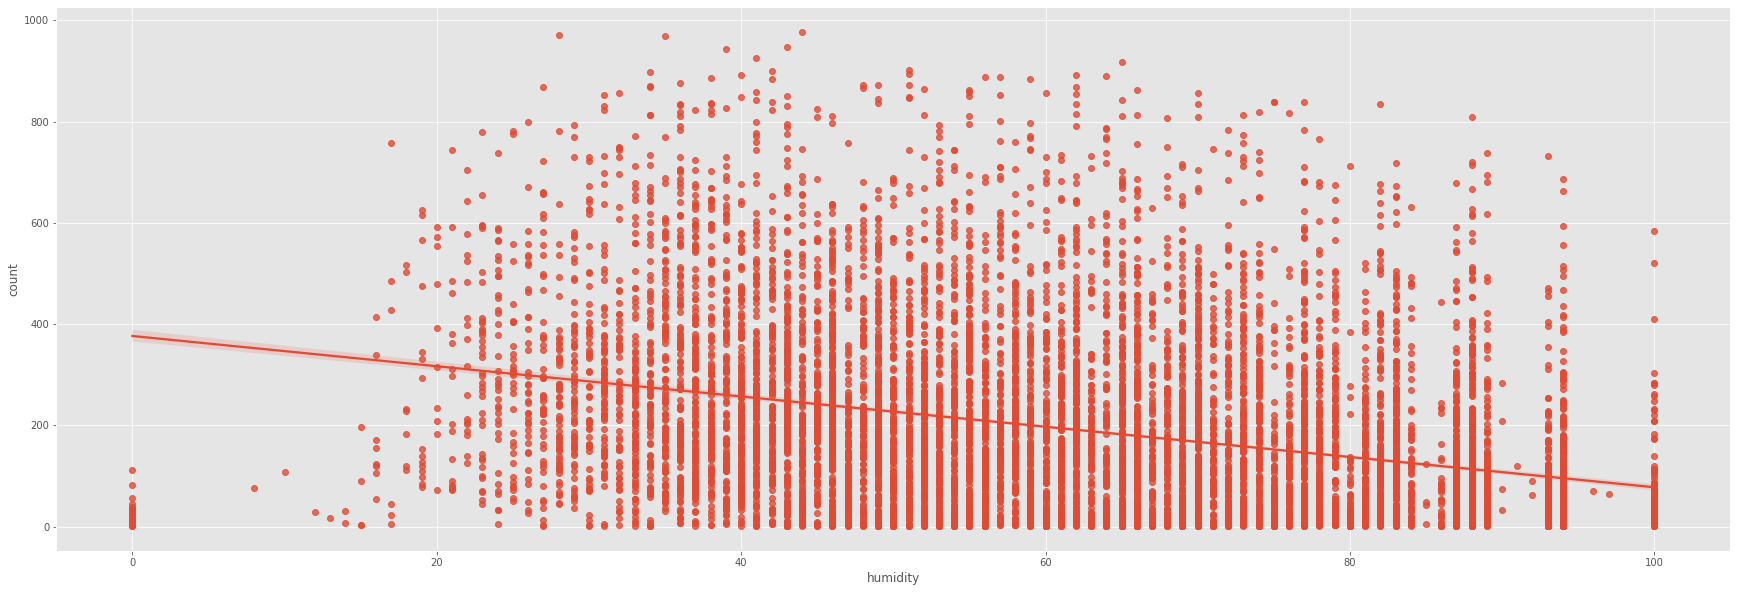

In [42]:
# 상대습도별 대여횟수

plt.figure(figsize=(30,10))
sns.regplot(data=train, x='humidity', y='count')

In [44]:
train[['casual','registered','count']].head()

,casual,registered,count
0,3,13,16
1,8,32,40
2,5,27,32
3,3,10,13
4,0,1,1
